<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/deeplearning/img_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/htp_project/xml

!unzip -qq "/content/drive/MyDrive/htp_project/xml/tree_xml.zip"

/content/drive/MyDrive/htp_project/xml


In [4]:
%cd /content/drive/MyDrive/htp_project/img

!unzip -qq "/content/drive/MyDrive/htp_project/img/나무 그림.zip"

/content/drive/MyDrive/htp_project/img


In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import random

In [27]:
img_dir = "/content/drive/MyDrive/htp_project/img/"

img_list = os.listdir(img_dir)
print(img_list)

['나무 (1).png', '나무 (29).jpg', '나무 (22).jpg', '나무 (24).jpg', '나무 (23).jpg', '나무 (20).jpg', '나무 (19).jpg', '나무 (18).jpg', '나무 (28).jpg', '나무 (17).jpg', '나무 (16).png', '나무 (15).jpg', '나무 (13).png', '나무 (10).jpg', '나무 (12).jpg', '나무 (8).jpeg', '나무 (11).jpg', '나무 (5).jpg', '나무 (9).jpeg', '나무 (2).jpg', '나무 (97).JPG', '나무 (21).png', '나무 (4).gif', '나무 (72).jpg', '나무 (3).gif', '나무 (98).png', '나무 (100).jpg', '나무 (94).jpg', '나무 (95).jpg', '나무 (7).png', '나무 (14).jpg', '나무 (99).jpg', '나무 (96).jpg', '나무 (6).png', '나무 (93).jpg', '나무 (55).jpg', '나무 (54).jpg', '나무 (49).jpg', '나무 (50).jpg', '나무 (53).jpg', '나무 (51).jpg', '나무 (52).jpg', '나무 (48).jpg', '나무 (44).jpg', '나무 (47).jpg', '나무 (46).jpg', '나무 (43).jpg', '나무 (45).png', '나무 (42).jpg', '나무 (35).jpg', '나무 (36).jpg', '나무 (34).jpg', '나무 (37).jpg', '나무 (39).jpg', '나무 (38).jpg', '나무 (41).jpg', '나무 (32).jpg', '나무 (33).jpg', '나무 (40).jpg', 'ᄂ

In [24]:
xml_dir = "/content/drive/MyDrive/htp_project/xml/"

xml_list = os.listdir(xml_dir)
print(xml_list)

['나무 (1).xml', '나무 (10).xml', '나무 (100).xml', '나무 (101).xml', '나무 (102).xml', '나무 (103).xml', '나무 (104).xml', '나무 (105).xml', '나무 (106).xml', '나무 (107).xml', '나무 (108).xml', '나무 (109).xml', '나무 (11).xml', '나무 (110).xml', '나무 (111).xml', '나무 (112).xml', '나무 (113).xml', '나무 (114).xml', '나무 (115).xml', '나무 (116).xml', '나무 (117).xml', '나무 (118).xml', '나무 (119).xml', '나무 (12).xml', '나무 (120).xml', '나무 (121).xml', '나무 (122).xml', '나무 (123).xml', '나무 (124).xml', '나무 (125).xml', '나무 (126).xml', '나무 (127).xml', '나무 (128).xml', '나무 (129).xml', '나무 (13).xml', '나무 (130).xml', '나무 (131).xml', '나무 (132).xml', '나무 (133).xml', '나무 (134).xml', '나무 (135).xml', '나무 (136).xml', '나무 (137).xml', '나무 (138).xml', '나무 (139).xml', '나무 (14).xml', '나무 (140).xml', '나무 (141).xml', '나무 (142).xml', '나무 (143).xml', '나무 (144).xml', '나무 (145).xml', '나무 (146).xml', '나무 (147).xml', '나무 (148).xml', '나무 (149).xml'

'나무 (10).xml'

In [65]:
import xml.etree.ElementTree as ET

obj_info_list = [] #모든 이미지의 오브젝트 정보가 담김, 이미지에 대한 오브젝트의 묶음
tree_info_list = [] #이미지명, 넓이, 위치의 딕셔너리가 담김
for file_name in xml_list:
  xml_file = os.path.join(xml_dir, file_name)

  #xml parsing
  tree = ET.parse(xml_file)
  root = tree.getroot()

  #root 하위 정보들을 가져온다.
  image_name = root.find('filename').text
  full_image_name = os.path.join(img_dir, image_name)
  image_size = root.find('size')
  image_width = int(image_size.find('width').text)
  image_height = int(image_size.find('height').text)

  #이미지에 존재하는 오브젝트의 바운딩 박스 좌표를 모두 가져온다.
  #오브젝트: 가지, 줄기, 뿌리, 나무 전체. 총 네 개.

  objects_list = []
  
                  
  for obj in root.findall('object'):
    tree_info_dict = {'image_name':image_name}  
    #object element의 자식 element에서 bhdbox를 찾음
    xmlbox = obj.find('bndbox') 
    #bhdbox element의 자식 element에서 xmin, ymin, xmax, ymax를 찾아 값인 text만 추출
    x1 = int(xmlbox.find('xmin').text) #left
    y1 = int(xmlbox.find('ymin').text) #top
    x2 = int(xmlbox.find('xmax').text) #right
    y2 = int(xmlbox.find('ymax').text) #bottom

    bndbox_pos = (x1, y1, x2, y2)
    class_name = obj.find('name').text #1001, 1002, 1003

    if class_name == '1004':
      tree_area = (y2-y1)*(x2-x1)
      tree_info_dict['area'] = tree_area

      img_center = image_width / 2
      tree_center = x1 + ((x2-x1) / 2)

      if tree_center < img_center / 2:
        tree_info_dict['location'] = 'left'
      elif tree_center > img_center * 1.5:
        tree_info_dict['location'] = 'right'
      else:
        tree_info_dict['location'] = 'center'
      
      tree_info_list.append(tree_info_dict)
    


    #딕셔너리 생성. 예: {'class_name':1001, 'bhdbox_pos':(100, 200, 200, 300)}
    object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos}
    objects_list.append(object_dict) #리스트에 넣는다.
  obj_info_list.append(objects_list)
  

# for all_info in info_list:
#   print(all_info)

In [66]:
tree_info_list

[{'image_name': '나무 (1).png', 'area': 160379, 'location': 'center'},
 {'image_name': '나무 (10).jpg', 'area': 273122, 'location': 'center'},
 {'image_name': '나무 (100).jpg', 'area': 157920, 'location': 'center'},
 {'image_name': '나무 (101).jpg', 'area': 994840, 'location': 'center'},
 {'image_name': '나무 (102).jpg', 'area': 1472754, 'location': 'center'},
 {'image_name': '나무 (103).jpg', 'area': 253650, 'location': 'center'},
 {'image_name': '나무 (104).jpg', 'area': 774400, 'location': 'center'},
 {'image_name': '나무 (105).jpg', 'area': 298350, 'location': 'center'},
 {'image_name': '나무 (106).jpg', 'area': 1726578, 'location': 'center'},
 {'image_name': '나무 (107).jpg', 'area': 415473, 'location': 'center'},
 {'image_name': '나무 (108).jpg', 'area': 1141483, 'location': 'center'},
 {'image_name': '나무 (109).jpg', 'area': 698895, 'location': 'center'},
 {'image_name': '나무 (11).jpg', 'area': 119812, 'location': 'center'},
 {'image_name': '나무 (110).jpg', 'area': 857265, 'location': 'center'},
 {'imag

tree location: center
tree size: 206881
img size: 275625


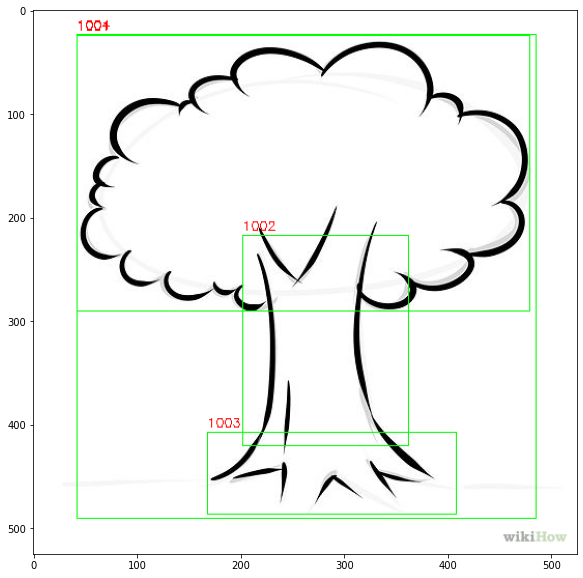

In [79]:
#리스트는 생성하지 않고 box 그려서 보여주는 코드


#xml load
xml_dir = "/content/drive/MyDrive/htp_project/xml/"
img_dir = "/content/drive/MyDrive/htp_project/img/"

xml_file = os.path.join(xml_dir, '나무 (111).xml')

#xml parsing
tree = ET.parse(xml_file)
root = tree.getroot()

#root 하위에 정보들 가져온다.
image_name = root.find('filename').text
full_image_name = os.path.join(img_dir, image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

img = cv2.imread(full_image_name)
draw_img = img.copy()
green_color = (0, 255, 0) #박스 컬러
red_color = (0, 0, 255) #라벨 컬러


# print('image_size:', (image_width, image_height))
for obj in root.findall('object'): #모든 object
    #object element의 자식 element에서 bndbox를 찾음
    xmlbox = obj.find('bndbox')
    #bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾아 값인 text만 추출 
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)

    class_name = obj.find('name').text

    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

for tree_info in tree_info_list:
  if tree_info['image_name'] == image_name:
    print('tree location:', tree_info['location'])
    print('tree size:', tree_info['area'])
    print('img size:', image_width*image_height)


img_gray = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_gray)